In [1]:
from facenet_pytorch import MTCNN
import torch, torchvision
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display


In [69]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

mtcnn = MTCNN(keep_all=False, device=device)

video = mmcv.VideoReader('/Users/chuyangzhou/Desktop/movie.mp4')

frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

cpu


In [61]:
display.Video('/Users/chuyangzhou/Desktop/movie.mp4')

In [70]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    print(type(boxes), end=" ")
    print(_)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    if boxes is None:
        continue
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')

Tracking frame: 1<class 'NoneType'> [None]
Tracking frame: 2<class 'NoneType'> [None]
Tracking frame: 3<class 'numpy.ndarray'> [1.]
Tracking frame: 4<class 'NoneType'> [None]
Tracking frame: 5<class 'numpy.ndarray'> [1. 1.]
Tracking frame: 6<class 'numpy.ndarray'> [1.]
Tracking frame: 7<class 'NoneType'> [None]
Tracking frame: 8<class 'NoneType'> [None]
Tracking frame: 9<class 'NoneType'> [None]
Tracking frame: 10<class 'numpy.ndarray'> [1.]
Tracking frame: 11<class 'NoneType'> [None]
Tracking frame: 12<class 'numpy.ndarray'> [1. 1.]
Tracking frame: 13<class 'numpy.ndarray'> [1. 1. 1. 1. 1.]
Tracking frame: 14<class 'numpy.ndarray'> [0.9999999]
Tracking frame: 15<class 'numpy.ndarray'> [1.]
Tracking frame: 16<class 'numpy.ndarray'> [1.]
Tracking frame: 17<class 'NoneType'> [None]
Tracking frame: 18<class 'numpy.ndarray'> [1.        0.7991063]
Tracking frame: 19<class 'numpy.ndarray'> [1.]
Tracking frame: 20<class 'numpy.ndarray'> [1.]
Tracking frame: 21<class 'numpy.ndarray'> [1. 1.]
T

In [63]:
torch.__version__

'1.9.1.post3'

In [64]:
torchvision.__version__


'0.10.0a0'

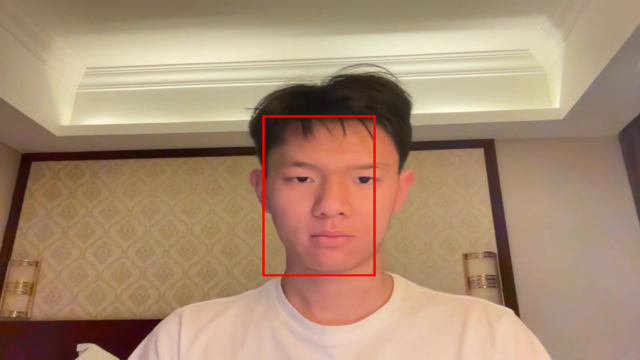

In [65]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass